<a href="https://colab.research.google.com/github/tan816/Signal-Reconstruction-ML/blob/main/notebooks/01_ECG%20signal%20extraction%20from%20%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1: ECG Signal Extraction (MIT-BIH Dataset)

This notebook loads and visualizes ECG signals from the MIT-BIH Arrhythmia Dataset.
The extracted signal serves as the clean reference for reconstruction experiments.


In [1]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 113.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [2]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
record= wfdb.rdrecord('100',pn_dir='mitdb')

In [4]:
print(record.sig_name)
print(record.fs)

['MLII', 'V5']
360


In [5]:
ecg=record.p_signal[:,0]
fs=record.fs

# Why MLII?
# Clear QRS complexes
# Most commonly used in literature
# Less noisy than some chest leads

In [6]:
t=np.arange(len(ecg))/fs

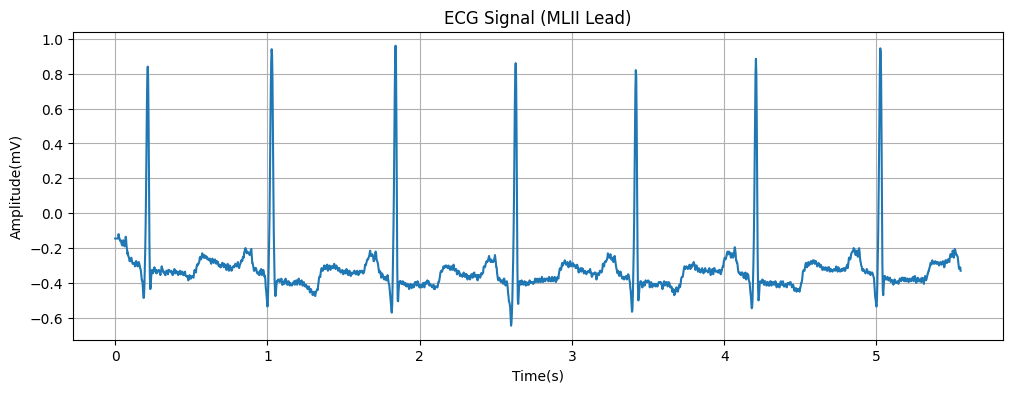

In [7]:
plt.figure(figsize=(12,4))
plt.plot(t[:2000],ecg[:2000])
plt.xlabel("Time(s)")
plt.ylabel("Amplitude(mV)")
plt.title("ECG Signal (MLII Lead)")
plt.grid(True)
plt.show()

## Observations

- The ECG signal is non-stationary.
- QRS complexes dominate the waveform.
- Sampling frequency of 360 Hz is sufficient to capture cardiac dynamics.

